In [484]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
warnings.filterwarnings("ignore")

import os
os.chdir("D:/Ebac/Trabajos Cientifico de Datos")
apps = pd.read_csv("apps.csv")
user_reviews = pd.read_csv("user_reviews.csv")

In [486]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [488]:
user_reviews.head()

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [490]:
apps.describe()

,Rating,Reviews,Size
count,8196.000000,9.659000e+03,8432.000000
mean,4.173243,2.165926e+05,20.395327
std,0.536625,1.831320e+06,21.827509
min,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000
50%,4.300000,9.670000e+02,12.000000
75%,4.500000,2.940100e+04,28.000000
max,5.000000,7.815831e+07,100.000000


In [492]:
user_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [494]:
apps = apps.drop_duplicates()
print("Total de apps a analizar:", apps.shape[0])

Total de apps a analizar: 9659


In [496]:
apps.describe()

,Rating,Reviews,Size
count,8196.000000,9.659000e+03,8432.000000
mean,4.173243,2.165926e+05,20.395327
std,0.536625,1.831320e+06,21.827509
min,1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000
50%,4.300000,9.670000e+02,12.000000
75%,4.500000,2.940100e+04,28.000000
max,5.000000,7.815831e+07,100.000000


In [498]:
apps['Installs'] = apps['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

apps['Price'] = apps['Price'].str.replace('$', '').astype(float)

print(apps[['Installs', 'Price']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Installs  9659 non-null   int32  
 1   Price     9659 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 113.3 KB
None


In [500]:
print(apps.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  

In [456]:
categorias_unicas = apps['Category'].unique()
print("Categorías únicas:", categorias_unicas)

Categorías únicas: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [458]:
conteo_por_categoria = apps['Category'].value_counts().sort_values(ascending=False)
print(conteo_por_categoria)

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64


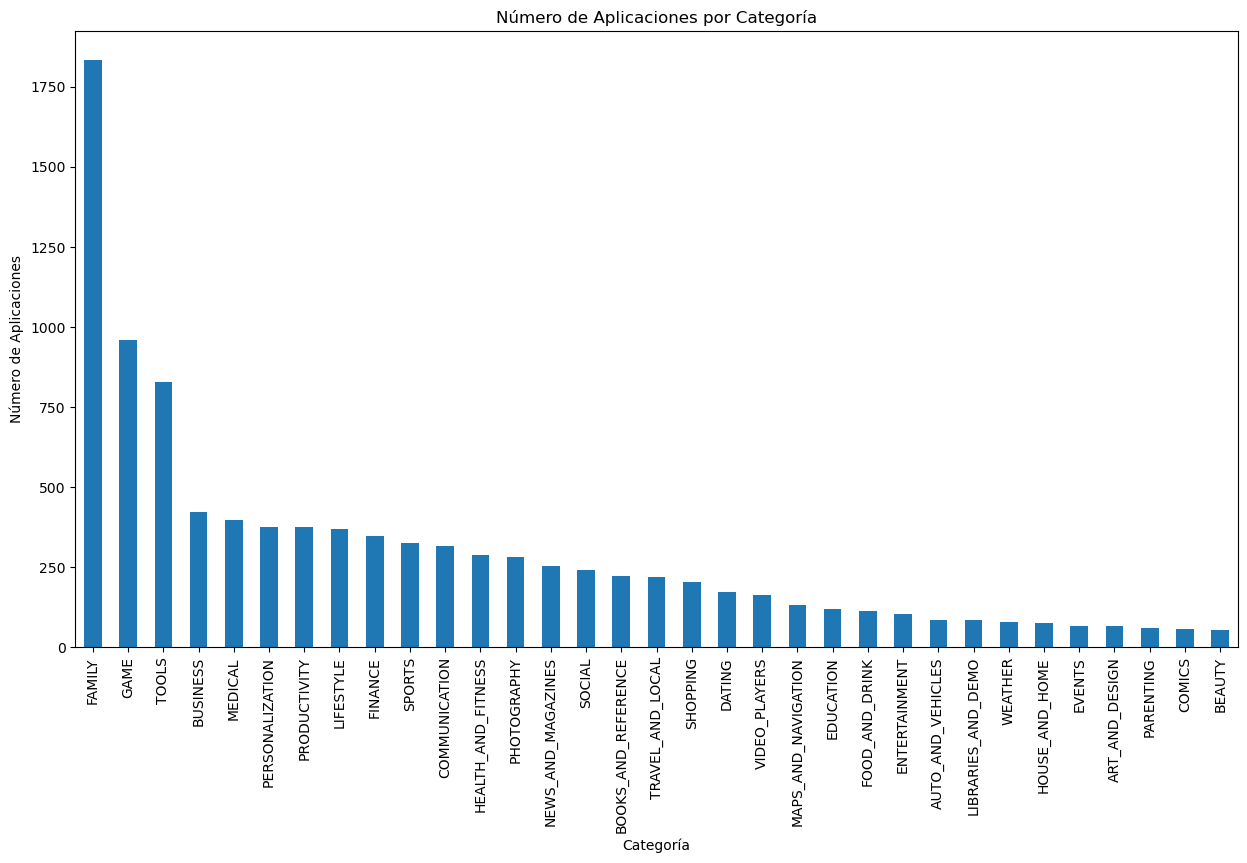

In [460]:
plt.figure(figsize=(15, 8))
conteo_por_categoria.plot(kind='bar')
plt.title('Número de Aplicaciones por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Aplicaciones')
plt.xticks(rotation=90)
plt.show()

In [461]:
promedio_calificacion_total = apps['Rating'].mean()
print("Promedio de calificación de todas las apps:", promedio_calificacion_total)

Promedio de calificación de todas las apps: 4.173243045387994


In [464]:
promedio_calificacion_por_categoria = apps.groupby('Category')['Rating'].mean()
print(promedio_calificacion_por_categoria)

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121484
DATING                 3.970149
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.179664
FINANCE                4.115563
FOOD_AND_DRINK         4.172340
GAME                   4.247368
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.166552
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.157414
PRODUCTIVITY           4.183389
SHOPPING               4.230000
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.039554
TRAVEL_AND_LOCAL       4.069519

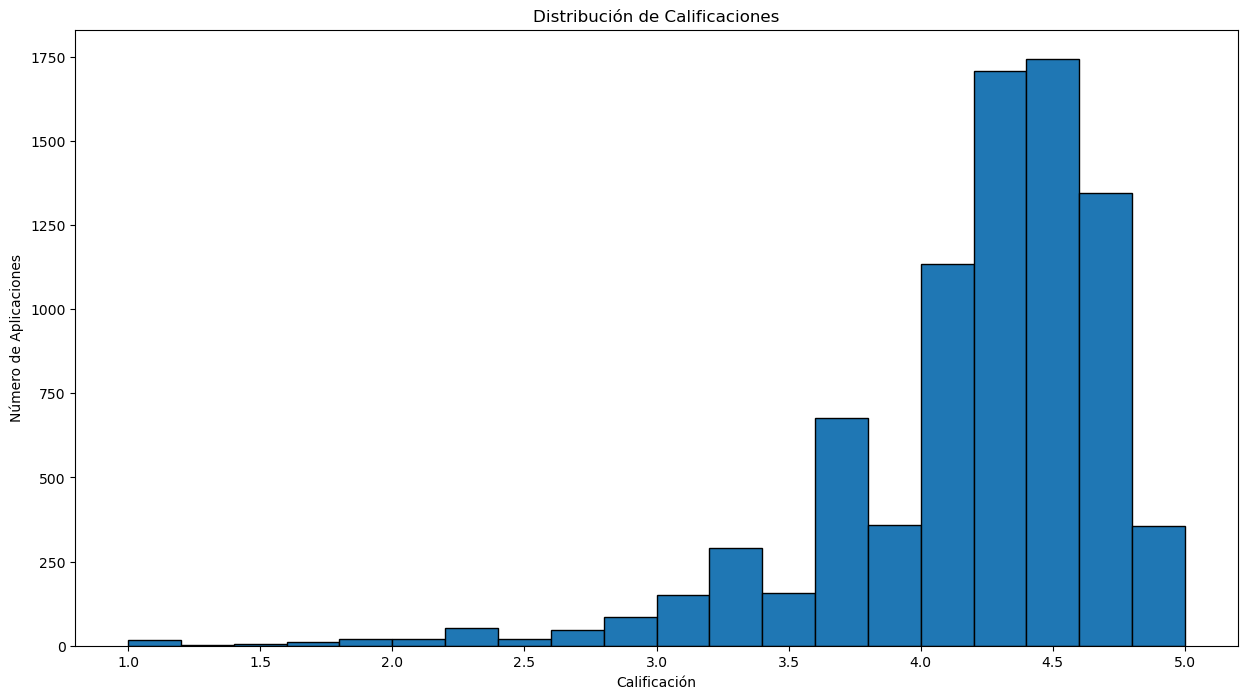

In [466]:
plt.figure(figsize=(15, 8))
plt.hist(apps['Rating'], bins=20, edgecolor='black')
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Número de Aplicaciones')
plt.show()

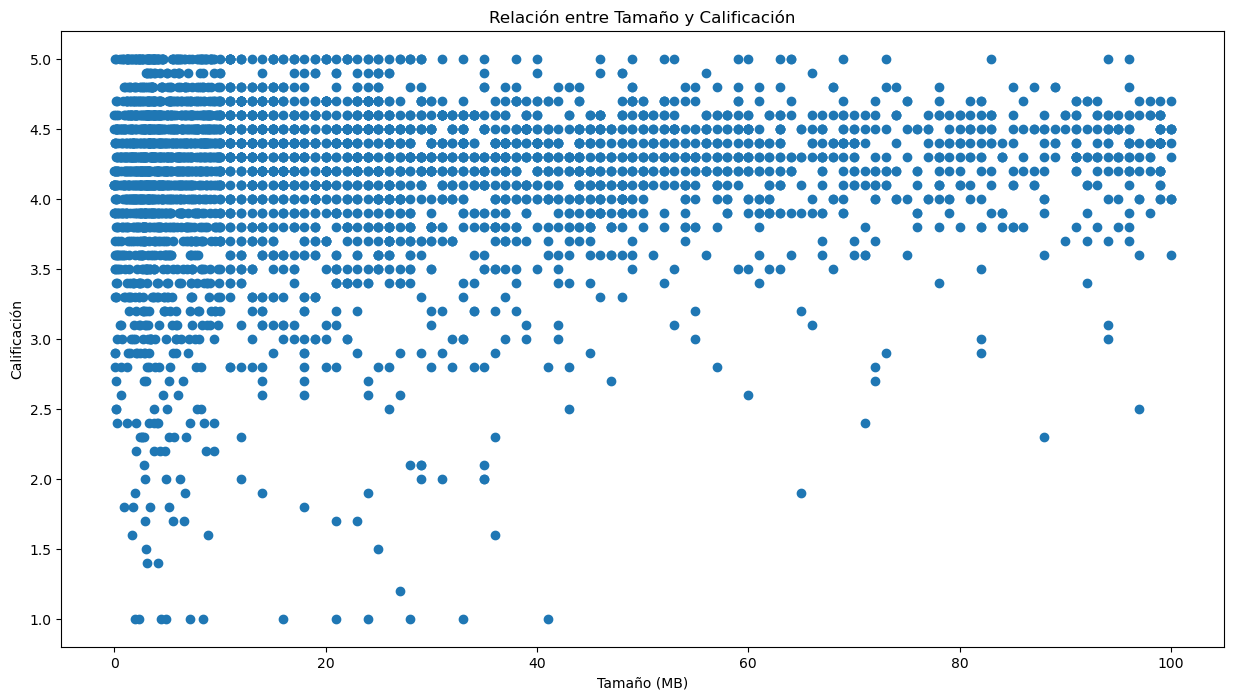

In [468]:
df_filtrado = apps.dropna(subset=['Rating', 'Size'])

categorias_populares = df_filtrado['Category'].value_counts()[df_filtrado['Category'].value_counts() >= 250].index
df_filtrado = df_filtrado[df_filtrado['Category'].isin(categorias_populares)]

plt.figure(figsize=(15, 8))
plt.scatter(df_filtrado['Size'], df_filtrado['Rating'])
plt.title('Relación entre Tamaño y Calificación')
plt.xlabel('Tamaño (MB)')
plt.ylabel('Calificación')
plt.show()

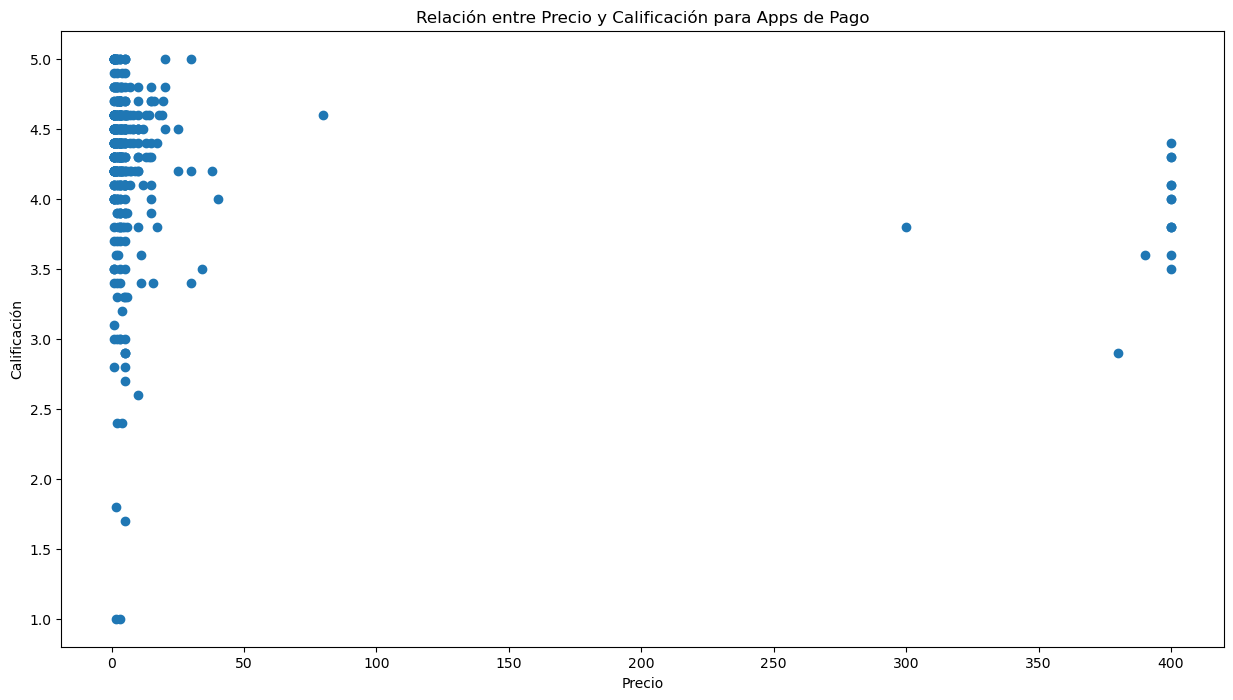

In [470]:
apps_de_pago = df_filtrado[df_filtrado['Type'] == 'Paid']

plt.figure(figsize=(15, 8))
plt.scatter(apps_de_pago['Price'], apps_de_pago['Rating'])
plt.title('Relación entre Precio y Calificación para Apps de Pago')
plt.xlabel('Precio')
plt.ylabel('Calificación')
plt.show()

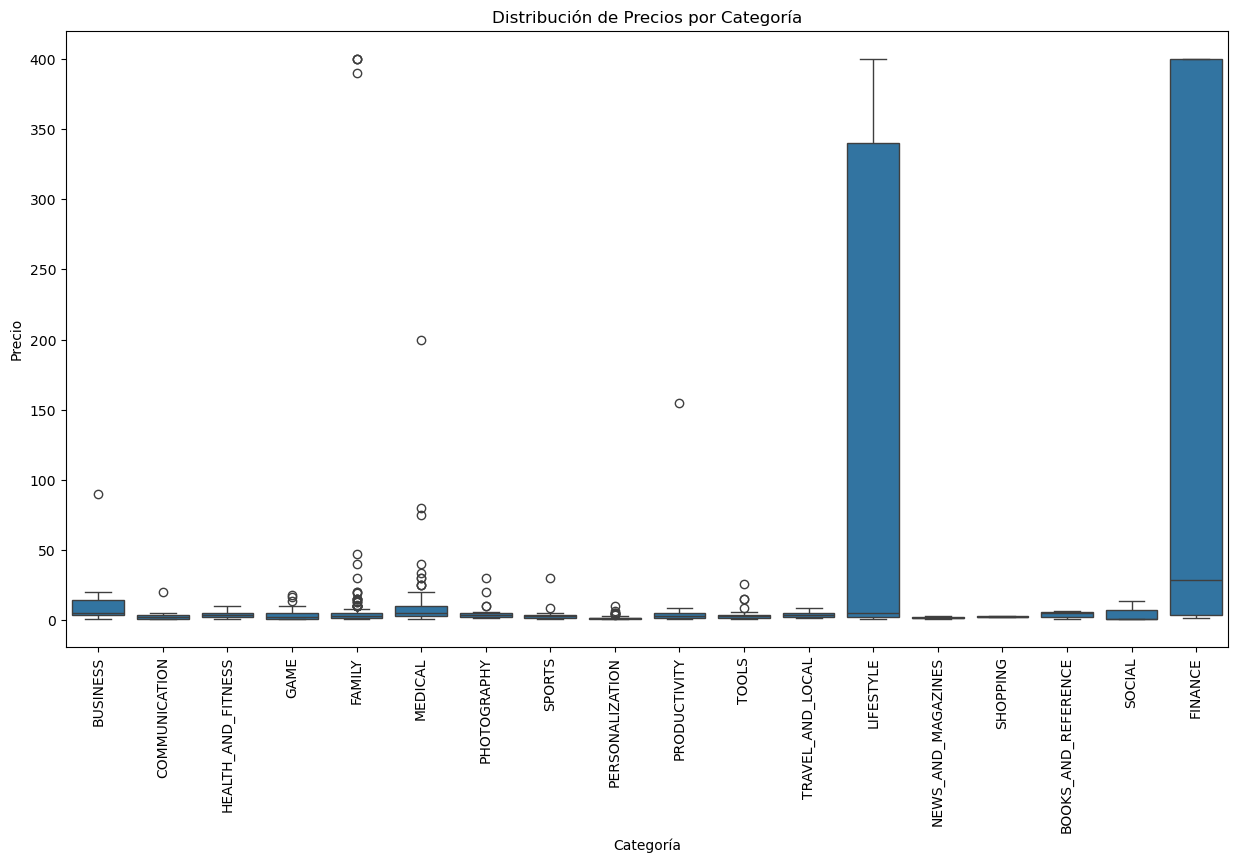

In [472]:
apps_de_pago = apps[apps['Type'] == 'Paid']
categorias_populares = apps['Category'].value_counts()[apps['Category'].value_counts() >= 200].index
df_filtrado = apps_de_pago[apps_de_pago['Category'].isin(categorias_populares)]

plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Price', data=df_filtrado)
plt.title('Distribución de Precios por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.show()

In [474]:
apps_caras = apps[apps['Price'] > 200]
print(apps_caras)

                                    App   Category  Rating  Reviews  Size  \
3327             most expensive app (H)     FAMILY     4.3        6   1.5   
3465                         💎 I'm rich  LIFESTYLE     3.8      718  26.0   
3469           I'm Rich - Trump Edition  LIFESTYLE     3.6      275   7.3   
4396                          I am rich  LIFESTYLE     3.8     3547   1.8   
4398                     I am Rich Plus     FAMILY     4.0      856   8.7   
4399                      I am rich VIP  LIFESTYLE     3.8      411   2.6   
4400                  I Am Rich Premium    FINANCE     4.1     1867   4.7   
4401                I am extremely Rich  LIFESTYLE     2.9       41   2.9   
4402                         I am Rich!    FINANCE     3.8       93  22.0   
4403                 I am rich(premium)    FINANCE     3.5      472   1.0   
4406                      I Am Rich Pro     FAMILY     4.4      201   2.7   
4408     I am rich (Most expensive app)    FINANCE     4.1      129   2.7   

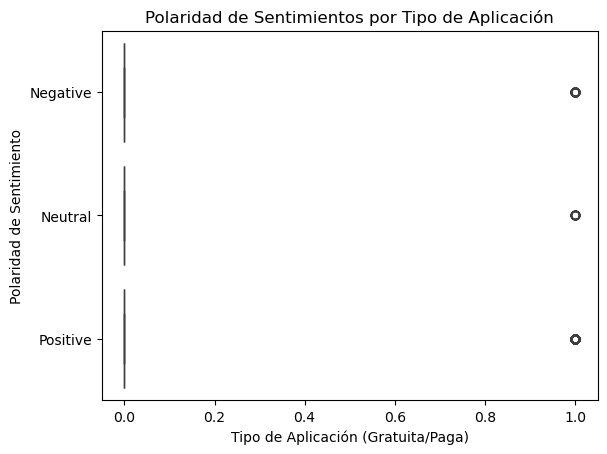

In [476]:
df_merged = pd.merge(apps, user_reviews, on='App')

df_merged = df_merged.dropna(subset=['Sentiment', 'Review'])

df_merged['Is_Paid'] = df_merged['Type'] == 'Paid'

sns.boxplot(x='Is_Paid', y='Sentiment', data=df_merged)
plt.title('Polaridad de Sentimientos por Tipo de Aplicación')
plt.xlabel('Tipo de Aplicación (Gratuita/Paga)')
plt.ylabel('Polaridad de Sentimiento')
plt.show()